# Theoretical Pricing Models
what price should the option be trading at?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# take in multiple option orderes
class optionGraph:
    """A class for representing and plotting option graphs."""
    def __init__(self):
        """
        Initializes the optionGrapgh object.

        Attributes:
          option_type: The type of option, either `call` or `put`.
          amount: The number of options.
          exercise_price: The exercise price of the option.
          slope: The slope of the option graph.
          price_range_max: The maximum price range of the option graph.
          price_range_min: The minimum price range of the option graph.
          multi_options_pos: A dictionary containing the positions of multiple option graphs in a multi-option plot. This attribute is only used in the `multi_option()` method.
        """
        self.option_type = ''
        self.amount = None
        self.exercise_price = None
        self.slope = None
        self.price_range_max = None
        self.price_range_min = None  
        self.contract_price = None
        self.multi_options_pos = None
        self.prob_dist = None

    def get_slope(self):
        """
        Calculates the slope of the option graph.

        Returns:
          A numpy array containing the slope of the option graph.
        """
        
        y = None
        if self.option_type == 'call': 
            x = np.arange(self.price_range_min-5, self.price_range_max+5)
            y =np.where(x>self.exercise_price,1,0)
            y = (np.cumsum(y) * self.amount) - (self.contract_price * self.amount)
        elif self.option_type== 'put':
            x = np.arange(self.price_range_min-5, self.price_range_max+5)
            y =np.where(x<self.exercise_price,1,0)
            y = (np.cumsum(y[::-1])[::-1] * self.amount) - (self.contract_price * self.amount)
            

            
        self.slope = y
        return y

    def plot_option(self):
        x = np.arange(self.price_range_min-5, self.price_range_max+5)
        plt.plot(x,self.slope)
        plt.axhline(y=0, color='red', linestyle='dotted')
        plt.bar(x, self.prob_dist, color='blue')
        plt.show()

    def expected_option_value(self):
        return self.prob_dist @ self.slope.T

    def multi_option(self):
        """
        Plots multiple option graphs on the same plot.

        The `multi_options_pos` attribute must be set before calling this method.
        The `multi_options_pos` attribute is a dictionary containing the positions of multiple option graphs in a multi-option plot.
        The dictionary should have the following keys:

        * `exercise_price`: A list of exercise prices for the option graphs.
        * `amount`: A list of amounts for the option graphs.
        * `option_type`: A list of option types for the option graphs.

        """
        self.price_range_max = max(self.multi_options_pos['exercise_price'])
        self.price_range_min = min(self.multi_options_pos['exercise_price'])
        slops = []
        for i in range(len(self.multi_options_pos['amount'])):
            self.amount = self.multi_options_pos['amount'][i]
            self.exercise_price = self.multi_options_pos['exercise_price'][i]
            self.option_type = self.multi_options_pos['option_type'][i]
            self.contract_price = self.multi_options_pos['contract_price'][i]
            slops.append(self.get_slope())
        if self.prob_dist:
            self.prob_dist = self.prob_dist
        else:
            x = np.arange(self.price_range_min-5, self.price_range_max+5)
            distribution = np.random.uniform(0, 1, len(x))
            self.prob_dist = distribution
        self.slope = sum(slops)
        self.plot_option()
            

    


In [76]:
a = optionGraph()
a.multi_options_pos = {'amount':[1,-1],'exercise_price':[65,70],
                       'option_type':['call','call'],
                      'contract_price':[.75,.25]}

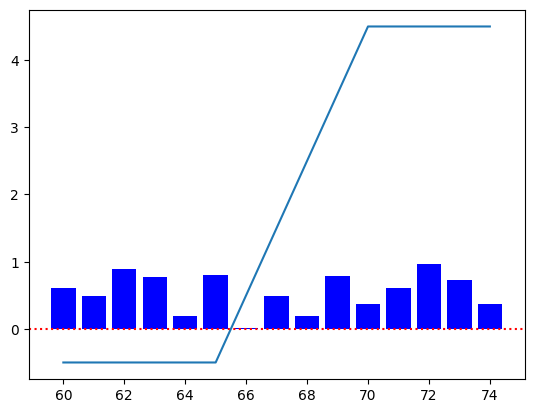

In [77]:
a.multi_option()

In [75]:
a.expected_option_value()

16.046218516495763

## Black Scholes overview
- black scholes is an option pricing model looking at a few diffrent inputs
  - Exercise price
  - time to experation
  - underlying price
  - Intrest rate
  - Volatitity
- you could also make a model using ML might do that as a side project

In [79]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.3 MB/s eta 0:00:0000:0100:01


In [82]:
import scipy.stats as stats
x=[1,2,3,4,5]
# Calculate the cdf of a normal distribution with mean 0 and standard deviation 1
# over the range [-10, 10]
cdf = stats.norm.cdf(x, loc=0, scale=1)

In [83]:
cdf

array([0.84134475, 0.97724987, 0.9986501 , 0.99996833, 0.99999971])